# Handheld CTD

In [516]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("ggplot")
# matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({
    'font.size': 18,          # Adjust the font size as needed
    'font.family': 'serif'   # Choose the font family (e.g., 'serif', 'sans-serif', 'monospace')
})

def plot_handheld_ctd(file_path, station_name):
    # importing and labeling data
    column_names = ["Pressure", "Depth","Temperature" ,"Conductivity" ,"Specific conductance" ,"Salinity" ,"Sound velocity" ,"Density"]
    # Pressure (Decibar),Depth (Meter),
    # Temperature (Celsius),
    # Conductivity (MicroSiemens per Centimeter),
    # Specific conductance (MicroSiemens per Centimeter),
    # Salinity (Practical Salinity Scale),
    # Sound velocity (Meters per Second),
    # Density (Kilograms per Cubic Meter)

    # meatadata
    df_info = pd.read_csv(file_path, header=None, nrows=28)
    lat, lon = float(df_info.iloc[9,1]), float(df_info.iloc[10,1])
    start_time, duration = df_info.iloc[2,1], df_info.iloc[21,1] #UTC, seconds

    # hydrographic data
    df = pd.read_csv(file_path, names = column_names, skiprows=29)
    P = df["Pressure"]
    T = df["Temperature"]
    S = df["Salinity"]
    depth = df["Depth"]
    rho = df["Density"]

    # # Create a figure with three subplots in one row
    # fig, axes = plt.subplots(1, 3, figsize=(10, 7))

    # # Plot Density vs. Depth
    # axes[0].plot(rho, depth, color = "tab:blue")
    # # axes[0].set_title('Density vs. Depth')
    # axes[0].set_xlabel('Density')
    # axes[0].set_ylabel('Depth')
    # axes[0].invert_yaxis()

    # # Plot Temperature vs. Depth
    # axes[1].plot(T, depth, color="tab:red")
    # # axes[1].set_title('Temperature vs. Depth')
    # axes[1].set_xlabel('Temperature')
    # axes[1].set_ylabel('Depth')
    # axes[1].invert_yaxis()


    # # Plot Salinity vs. Depth
    # axes[2].plot(S, depth, color="tab:green")
    # # axes[2].set_title('Salinity vs. Depth')
    # axes[2].set_xlabel('Salinity')
    # axes[2].set_ylabel('Depth')
    # axes[2].invert_yaxis()

    # # Add a main title
    # plt.suptitle(f"Handheld CTD, {station_name}\n\n Lat: {lat:.2f}, Lon: {lon:.2f}, Time(UTC): {start_time}, Duration: {duration}")


    # # Adjust spacing between subplots
    # plt.tight_layout()
    ##################
    # Create a figure with three subplots in one row, sharing the same y-axis
    a=.8
    fig, axes = plt.subplots(1, 3, figsize=(10*a, 7*a), sharey=True)
    
    font_s = 16

    axes[0].tick_params(axis='both', labelsize=font_s-1)
    axes[1].tick_params(axis='both', labelsize=font_s-1)
    axes[2].tick_params(axis='both', labelsize=font_s-1)


    # Plot Density vs. Depth
    axes[0].plot(rho-1000, depth, color="tab:blue")
    axes[0].set_xlabel('Density $[kg/m^3]$', fontsize=font_s)
    # axes[0].set_ylabel('Depth')
    axes[0].invert_yaxis()

    # Plot Temperature vs. Depth
    axes[1].plot(T, depth, color="tab:red")
    axes[1].set_xlabel('Temperature [$C^{\\circ}$]', fontsize=font_s)
    axes[1].invert_yaxis()

    # Plot Salinity vs. Depth
    axes[2].plot(S, depth, color="tab:green")
    axes[2].set_xlabel('Salinity $[PSU]$', fontsize=font_s)
    axes[2].invert_yaxis()

    # Add a main title
    plt.suptitle(f"Handheld CTD, {station_name}\n Lat: {lat:.2f}, Lon: {lon:.2f}, Time(UTC): {start_time}")#, Duration: {duration}")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Share y-axis labels and set a common y-axis label for the row of subplots
    axes[0].set_ylabel('Depth [m]', fontsize=font_s)
    axes[0].set_ylim(52, 0) 


    #################

    # Show the plots
    # plt.savefig(f"figures/handheld_ctd/handhedld_ctd_{station_name.replace(',', '').replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    return [station_name, lat, lon, start_time]

   

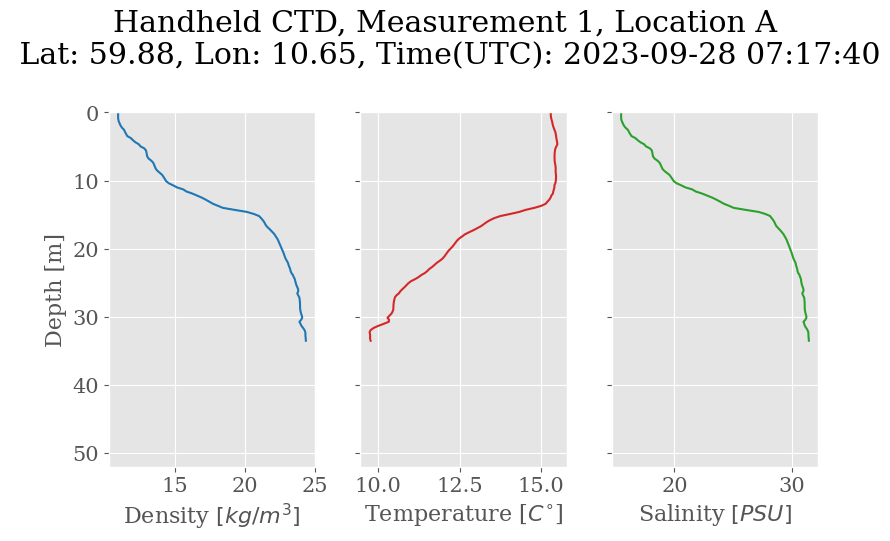

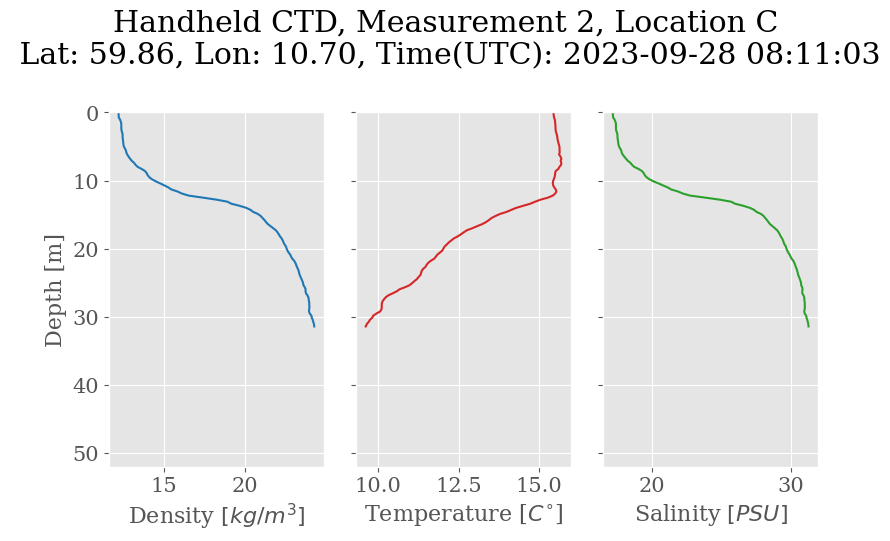

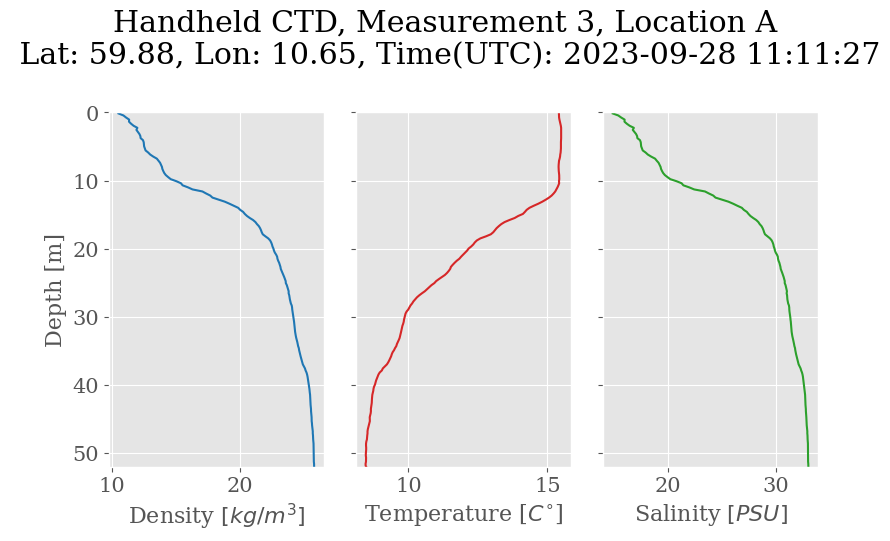

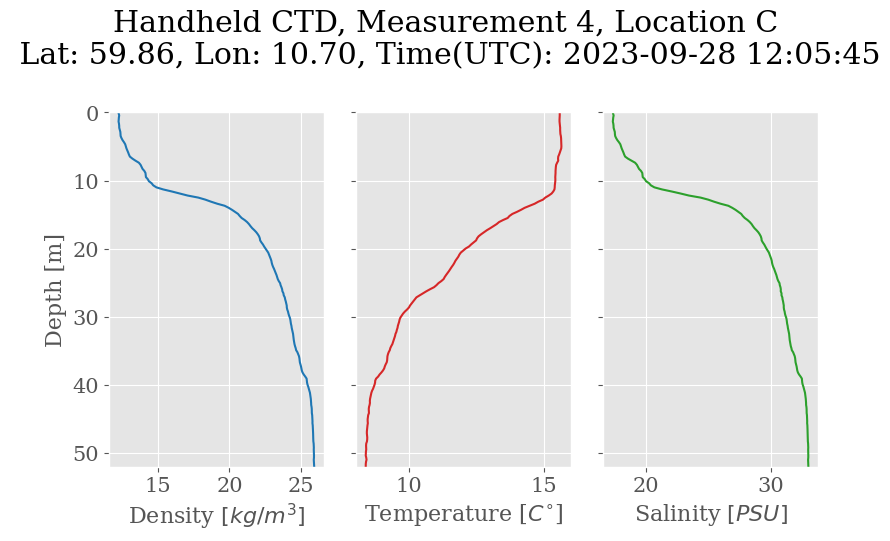

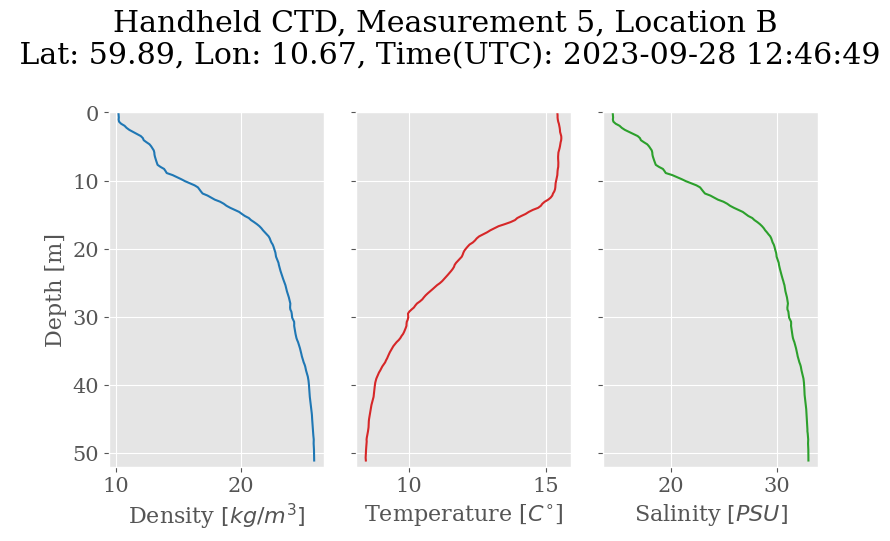

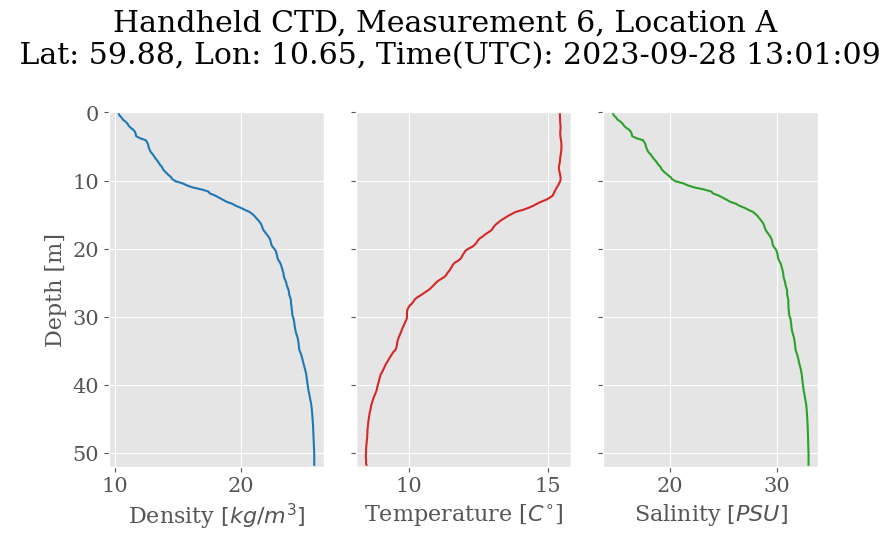

In [517]:
station1 = plot_handheld_ctd("data/handheld_ctd/CC2240001_20230928_071740.csv", "Measurement 1, Location A")
station2 = plot_handheld_ctd("data/handheld_ctd/CC2240001_20230928_081103.csv", "Measurement 2, Location C")
station3 = plot_handheld_ctd("data/handheld_ctd/CC2240001_20230928_111127.csv", "Measurement 3, Location A")
station4 = plot_handheld_ctd("data/handheld_ctd/CC2240001_20230928_120545.csv", "Measurement 4, Location C")
station5 = plot_handheld_ctd("data/handheld_ctd/CC2240001_20230928_124649.csv", "Measurement 5, Location B")
station6 = plot_handheld_ctd("data/handheld_ctd/CC2240001_20230928_130109.csv", "Measurement 6, Location A")


In [518]:
import ssl

# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

def plot_locations(list_of_stations):
    fig = plt.figure(figsize=(8, 6))
    # plot location on map
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 8))
    # adding map features
    ax.add_feature(cfeature.BORDERS, edgecolor = 'darkgray', linestyle='-')
    ax.add_feature(cfeature.LAND, edgecolor = 'black', facecolor= 'burlywood')
    ax.add_feature(cfeature.OCEAN, edgecolor = 'lightblue', facecolor= 'lightblue')

    for station in list_of_stations:
        # adding coordinate point
        lon = float(station[2])
        lat = float(station[1])
        name = station[0]
        ax.plot(lon, lat, 'ro', markersize=7, transform=ccrs.PlateCarree())
        ax.text(lon + 0.002, lat + 0.002, name, fontsize=18, transform=ccrs.PlateCarree())

    ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    ax.set_extent([10.62, 10.76, 59.73, 59.92], ccrs.PlateCarree())
    #ax.set_title('Hydrographic measurment locations in the Oslo fjord')
    plt.savefig(f"figures/station_map_{len(list_of_stations)}_stations.png", dpi=300, bbox_inches='tight')

    plt.show()

<Figure size 800x600 with 0 Axes>

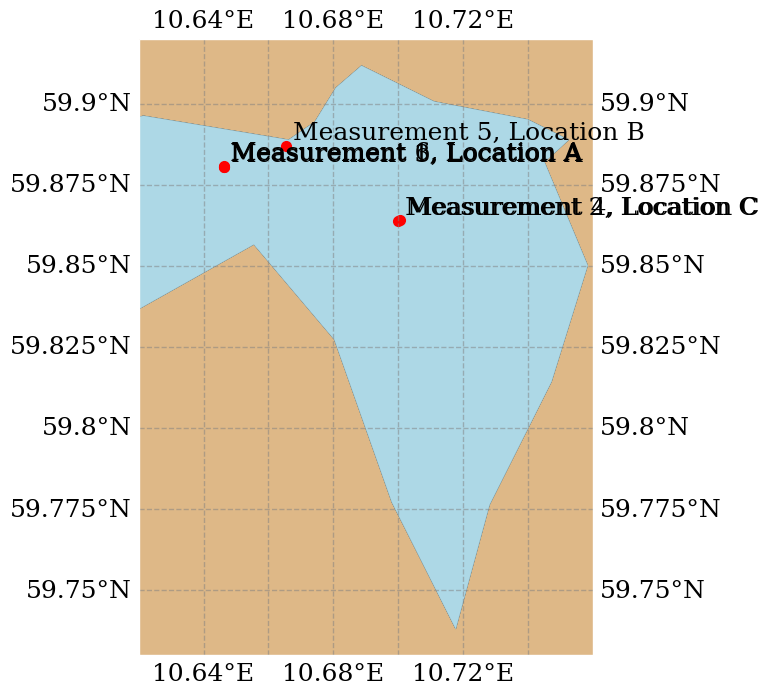

In [519]:
list_of_stations = [station1, station2, station3, station4, station5, station6]
plot_locations(list_of_stations)

<Figure size 800x600 with 0 Axes>

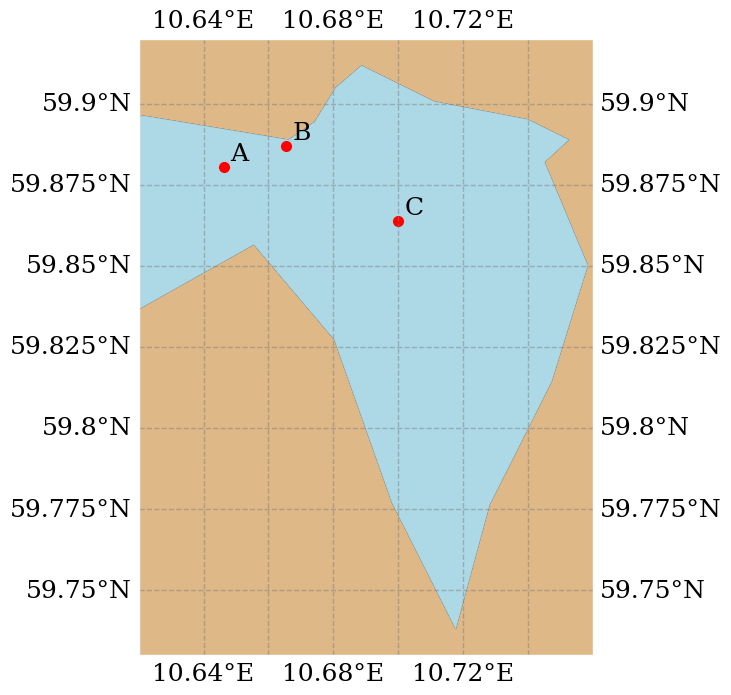

In [520]:
station1[0], station2[0], station5[0] = "A", "C", "B"
list_of_stations = [station1, station2, station5]

plot_locations(list_of_stations)

2 stations in the morning, same two plus loc 5? in the afternoon.

# Ship CTD

In [521]:
def plot_ship_ctd(file_path, measurment_name):
    import pandas as pd
    import re
    from io import StringIO  # Import StringIO from the standard library

    matplotlib.rcParams.update({
    'font.size': 18,          # Adjust the font size as needed
    'font.family': 'serif'   # Choose the font family (e.g., 'serif', 'sans-serif', 'monospace')
})
    # Initialize variables to store metadata and data
    metadata = {}
    data_lines = []
    system_upload_time = None  # Initialize the system upload time variable

    # Read the file and extract metadata and data
    with open(file_path, 'r') as file:
        in_metadata = True
        for line in file:
            if in_metadata:
                # Parse metadata using regular expressions
                match = re.match(r'# name (\d+) = (\S+): (.+)', line)
                if match:
                    index, name, description = match.groups()
                    metadata[int(index)] = (name, description)
                elif line.startswith('* System UTC'):
                    # Extract the System UpLoad Time
                    system_upload_time = line.split('=')[-1].strip()
            else:
                data_lines.append(line)
            if line.strip() == "*END*":
                in_metadata = False

    # Create a pandas DataFrame from the data lines with space as the delimiter
    # Use the extracted names as column names
    column_names = [metadata[i][0] for i in range(len(metadata))]
    df = pd.read_csv(StringIO('\n'.join(data_lines)), delim_whitespace=True, names=column_names)

    # Now you have the metadata in the 'metadata' dictionary, the data in the 'df' DataFrame,
    # and the system upload time as a variable


    # Now you have the metadata in the 'metadata' dictionary, and the data in the 'df' DataFrame
    # The extracted names are used as column names in the DataFrame

    # name 0 = depSM: Depth [salt water, m], lat = 59.90
    # name 1 = t090C: Temperature [ITS-90, deg C]
    # name 2 = sal00: Salinity, Practical [PSU]
    # name 3 = sigma-t00: Density [sigma-t, kg/m^3 ]
    # name 4 = flSP: Fluorescence, Seapoint
    # name 5 = seaTurbMtr: Turbidity, Seapoint [FTU]
    # name 6 = svCM: Sound Velocity [Chen-Millero, m/s]
    # name 7 = sbeox0PS: Oxygen, SBE 43 [% saturation]
    # name 8 = sbeox0Mg/L: Oxygen, SBE 43 [mg/l]
    # name 9 = timeJ: Julian Days
    # name 10 = oxsatML/L: Oxygen Saturation, Weiss [ml/l]
    # name 11 = prDM: Pressure, Digiquartz [db]
    # name 12 = wetStar: Fluorescence, WET Labs WETstar [mg/m^3]
    # name 13 = c0mS/cm: Conductivity [mS/cm]
    # name 14 = flag:  0.000e+00

    depth = df["depSM"]
    S = df["sal00"]
    P = df["prDM"]
    T = df["t090C"]
    rho = df["sigma-t00"]

    # # Create a figure with three subplots in one row
    # fig, axes = plt.subplots(1, 3, figsize=(10, 7))

    # # Plot Density vs. Depth
    # axes[0].plot(rho, depth)
    # # axes[0].set_title('Density vs. Depth')
    # axes[0].set_xlabel('Density')
    # axes[0].set_ylabel('Depth')
    # axes[0].invert_yaxis()

    # # Plot Temperature vs. Depth
    # axes[1].plot(T, depth, color="r")
    # # axes[1].set_title('Temperature vs. Depth')
    # axes[1].set_xlabel('Temperature')
    # axes[1].set_ylabel('Depth')
    # axes[1].invert_yaxis()


    # # Plot Salinity vs. Depth
    # axes[2].plot(S, depth, color="green")
    # # axes[2].set_title('Salinity vs. Depth')
    # axes[2].set_xlabel('Salinity')
    # axes[2].set_ylabel('Depth')
    # axes[2].invert_yaxis()

    # # Add a main title
    # plt.suptitle(f"Ship CTD, {measurment_name}\nTime(UTC): {system_upload_time}")


    # # Adjust spacing between subplots
    # plt.tight_layout()
    ###############
    # Create a figure with three subplots in one row, sharing the same y-axis
    a=.8
    fig, axes = plt.subplots(1, 3, figsize=(10*a, 7*a), sharey=True)

    font_s = 16

    axes[0].tick_params(axis='both', labelsize=font_s-1)
    axes[1].tick_params(axis='both', labelsize=font_s-1)
    axes[2].tick_params(axis='both', labelsize=font_s-1)

    # Plot Density vs. Depth
    axes[0].plot(rho, depth, color = "tab:blue")
    axes[0].set_xlabel('Density $[kg/m^3]$', fontsize=font_s)
    # axes[0].set_ylabel('Depth')
    axes[0].invert_yaxis()

    # Plot Temperature vs. Depth
    axes[1].plot(T, depth, color="tab:red")
    axes[1].set_xlabel('Temperature [$C^{\\circ}$]', fontsize=font_s)
    axes[1].invert_yaxis()

    # Plot Salinity vs. Depth
    axes[2].plot(S, depth, color="tab:green")
    axes[2].set_xlabel('Salinity $[PSU]$', fontsize=font_s)
    axes[2].invert_yaxis()

    # Add a main title
    plt.suptitle(f"Ship CTD, {measurment_name}\nTime(UTC): {system_upload_time}")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Share y-axis labels and set a common y-axis label for the row of subplots
    axes[0].set_ylabel('Depth $[m]$', fontsize = font_s)

    ##############
    # Show the plots
    # plt.savefig(f"figures/ship_ctd/ship_ctd_{measurment_name.replace(',', '').replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    # plt.show()





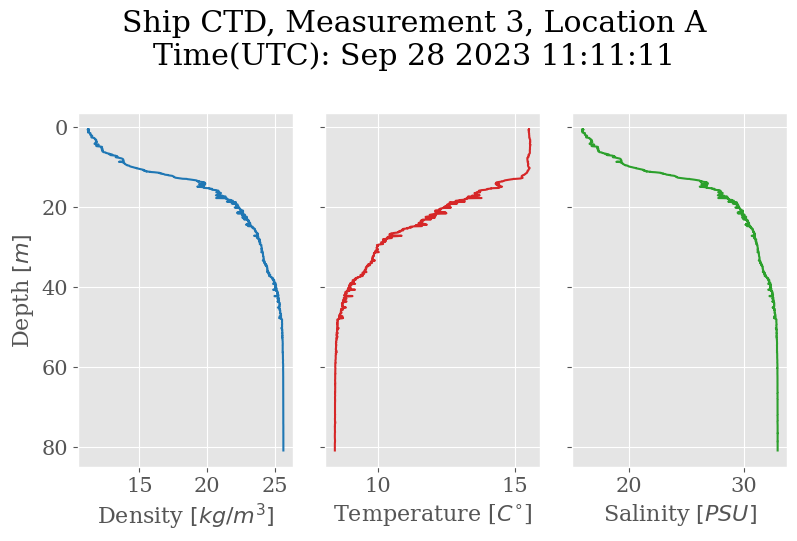

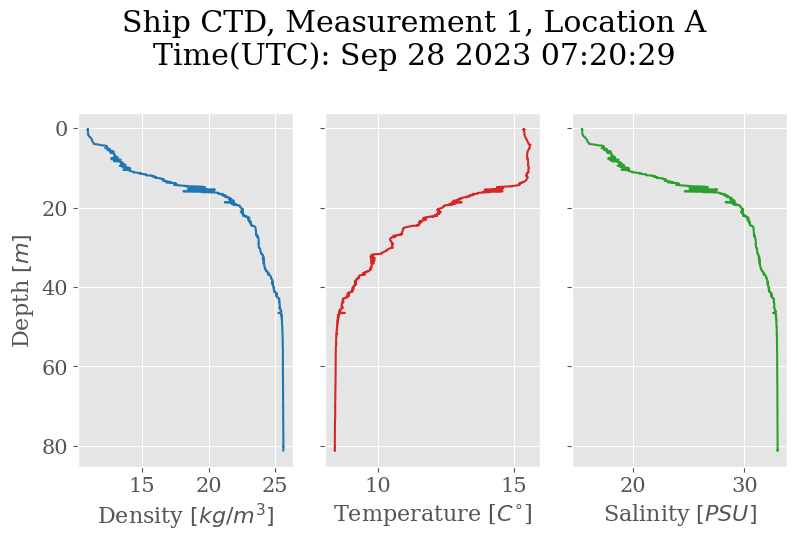

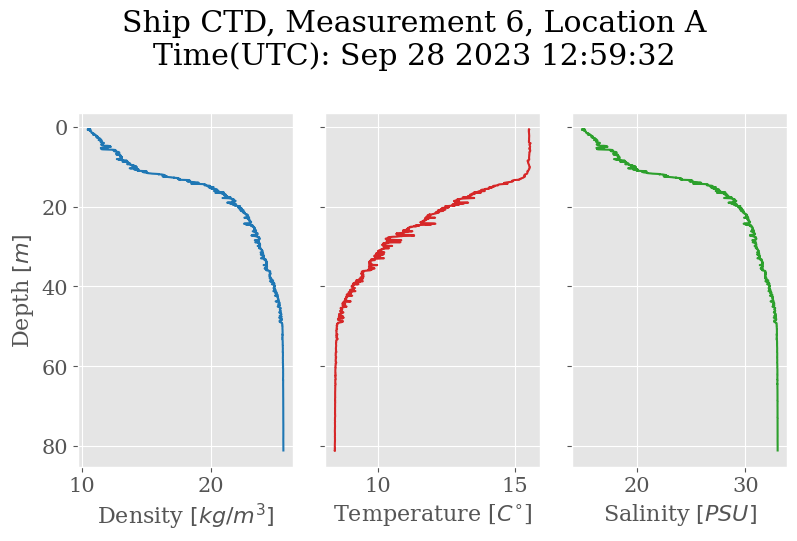

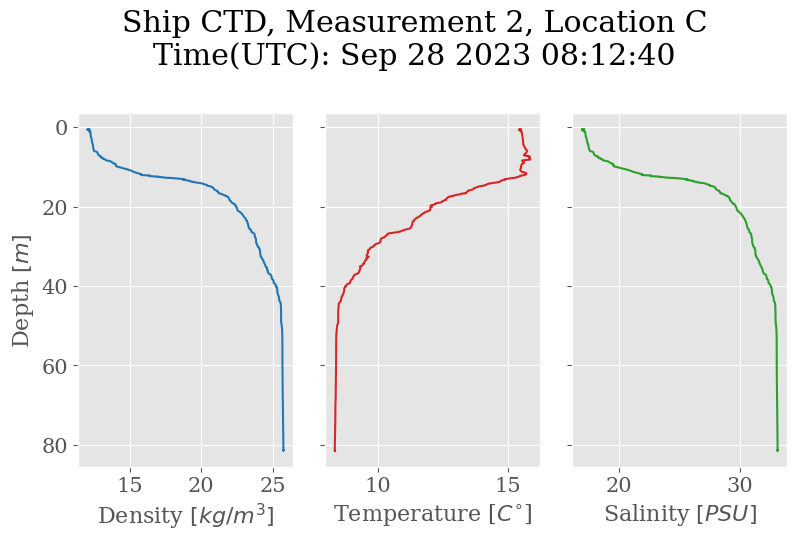

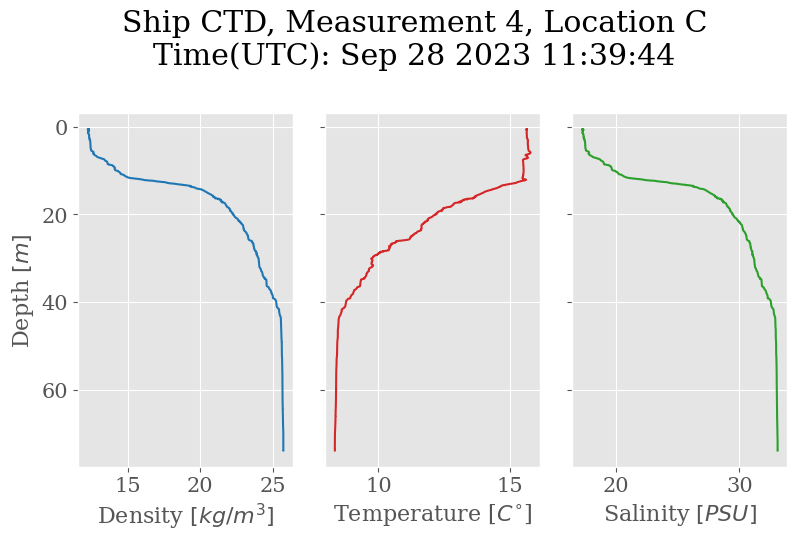

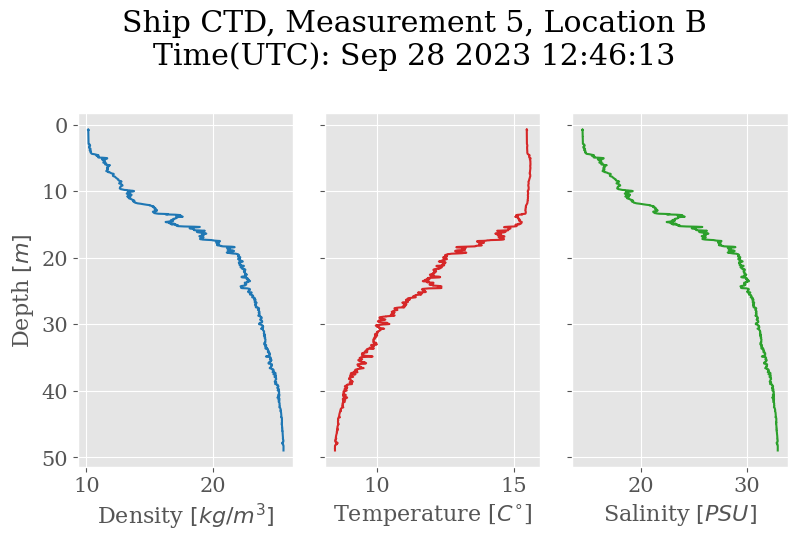

In [522]:
  # Define the file path
# file_path = "data/ship_ctd/BN1_LYSF_280923_tokt2.cnv"
    # file_path = "data/ship_ctd/BN1_LYSF_280923.cnv"
    # file_path = "data/ship_ctd/BN1-Lysakerfjorden_280923_tokt2.cnv"
    # file_path = "data/ship_ctd/CP1_Oksvallflua_280923_1.cnv"
    # file_path = "data/ship_ctd/CP1_Oksvallflua_280923_2.cnv"
    # file_path = "data/ship_ctd/CP1_Oksvallflua_280923_tokt2.cnv"
    # file_path = "data/ship_ctd/CP1_Oksvallflua_280923.cnv"
    # file_path = "data/ship_ctd/Driftboyeposisjon_280923_tokt2.cnv"
    # file_path = "data/ship_ctd/R2_280923_tokt2.cnv"

plot_ship_ctd("data/ship_ctd/BN1_LYSF_280923_tokt2.cnv", "Measurement 3, Location A")
plot_ship_ctd("data/ship_ctd/BN1_LYSF_280923.cnv", "Measurement 1, Location A")
plot_ship_ctd("data/ship_ctd/BN1-Lysakerfjorden_280923_tokt2.cnv", "Measurement 6, Location A")
# plot_ship_ctd("data/ship_ctd/CP1_Oksvallflua_280923_1.cnv", "") # Drifter?
plot_ship_ctd("data/ship_ctd/CP1_Oksvallflua_280923_2.cnv", "Measurement 2, Location C")
# plot_ship_ctd("data/ship_ctd/CP1_Oksvallflua_280923.cnv", "") # Drifter?
plot_ship_ctd("data/ship_ctd/Driftboyeposisjon_280923_tokt2.cnv", "Measurement 4, Location C")
plot_ship_ctd("data/ship_ctd/R2_280923_tokt2.cnv", "Measurement 5, Location B")





# Drifters

In [523]:
file_path = "data/drifters/drifter_deployments_And_recoveries.txt"
df = pd.read_csv(file_path, sep=',')

df

,Name,Time,Position,Comments,Unnamed: 4
0,Flyterigg1 ut,09:52,N 59°52.110'; E 010°42.017',15:12:06 Thursday; September 28; 202376.6 mFalse,NaN
1,Flyterigg1 inn 0m,11:58,N 59°51.741'; E 010°40.945',15:11:50 Thursday; September 28; 202326.2 mFalse,NaN
2,Flyterigg1 inn 20m,11:51,N 59°51.952'; E 010°41.793',15:11:53 Thursday; September 28; 202354.2 mFalse,NaN
3,Flyterigg1 inn 3m,11:42,N 59°52.016'; E 010°41.625',15:11:58 Thursday; September 28; 202352.6 mFalse,NaN
4,Flyterigg1 inn 5m,11:45,N 59°52.058'; E 010°41.737',15:12:02 Thursday; September 28; 202356.9 mFalse,NaN
5,Flyterigg2 ut,13:47,N 59°52.133'; E 010°42.017',15:12:11 Thursday; September 28; 202375.4 mFalse,NaN
6,Flyterigg2 inn 0m,14:23,N 59°52.373'; E 010°41.729',15:11:51 Thursday; September 28; 202371.0 mFalse,NaN
7,Flyterigg2 inn 20m,14:35,N 59°52.109'; E 010°41.968',15:11:57 Thursday; September 28; 202375.7 mFalse,NaN
8,Flyterigg2 inn 3m,14:27,N 59°52.255'; E 010°41.865',15:12:00 Thursday; September 28; 202372.1 mFalse,NaN
9,Flyterigg2 inn 5m,14:30,N 59°52.252'; E 010°41.892',15:12:03 Thursday; September 28; 202370.6 mFalse,NaN


In [524]:
# Define a function to convert a single coordinate
import re
def convert_to_decimal(coord_str):
    pattern = r"N (\d+)°(\d+\.\d+)'; E (\d+)°(\d+\.\d+)'"
    match = re.match(pattern, coord_str)
    if match:
        lat_degrees, lat_minutes, lon_degrees, lon_minutes = map(float, match.groups())
        lat_decimal = lat_degrees + (lat_minutes / 60)
        lon_decimal = lon_degrees + (lon_minutes / 60)
        return f"{lat_decimal}, {lon_decimal}"
    else:
        return "Invalid format"
    
df['Position'] = df['Position'].apply(convert_to_decimal)
df

,Name,Time,Position,Comments,Unnamed: 4
0,Flyterigg1 ut,09:52,"59.8685, 10.700283333333333",15:12:06 Thursday; September 28; 202376.6 mFalse,NaN
1,Flyterigg1 inn 0m,11:58,"59.86235, 10.682416666666667",15:11:50 Thursday; September 28; 202326.2 mFalse,NaN
2,Flyterigg1 inn 20m,11:51,"59.86586666666667, 10.69655",15:11:53 Thursday; September 28; 202354.2 mFalse,NaN
3,Flyterigg1 inn 3m,11:42,"59.866933333333336, 10.69375",15:11:58 Thursday; September 28; 202352.6 mFalse,NaN
4,Flyterigg1 inn 5m,11:45,"59.86763333333333, 10.695616666666666",15:12:02 Thursday; September 28; 202356.9 mFalse,NaN
5,Flyterigg2 ut,13:47,"59.868883333333336, 10.700283333333333",15:12:11 Thursday; September 28; 202375.4 mFalse,NaN
6,Flyterigg2 inn 0m,14:23,"59.872883333333334, 10.695483333333334",15:11:51 Thursday; September 28; 202371.0 mFalse,NaN
7,Flyterigg2 inn 20m,14:35,"59.86848333333333, 10.699466666666666",15:11:57 Thursday; September 28; 202375.7 mFalse,NaN
8,Flyterigg2 inn 3m,14:27,"59.870916666666666, 10.69775",15:12:00 Thursday; September 28; 202372.1 mFalse,NaN
9,Flyterigg2 inn 5m,14:30,"59.870866666666664, 10.6982",15:12:03 Thursday; September 28; 202370.6 mFalse,NaN


In [525]:
hour = int(df.iloc[0].Time.split(":")[0]) -2
min = int(df.iloc[0].Time.split(":")[1])
print(f"{hour}:{min}z")

7:52z


In [536]:
#tokt1
out = df.iloc[0]
in_m0 = df.iloc[1]
in_m3 = df.iloc[3]
in_m5 = df.iloc[4]
in_m20 = df.iloc[2]

def drifter_point(drifter, color, marker = '.', label = ""):
    pos = drifter.Position.split(", ")
    lat = float(pos[0])
    lon = float(pos[1])
    time = drifter.Time
    hour = int(drifter.Time.split(":")[0]) -2
    min = int(drifter.Time.split(":")[1])

    ax.plot(lon , lat , marker, markersize=18, color=color, transform=ccrs.PlateCarree(), label=label + f"at {hour}:{min}z")



print(out)



Name                                              Flyterigg1 ut
Time                                                      09:52
Position                            59.8685, 10.700283333333333
Comments       15:12:06 Thursday; September 28; 202376.6 mFalse
Unnamed: 4                                                  NaN
Name: 0, dtype: object


<Figure size 1000x700 with 0 Axes>

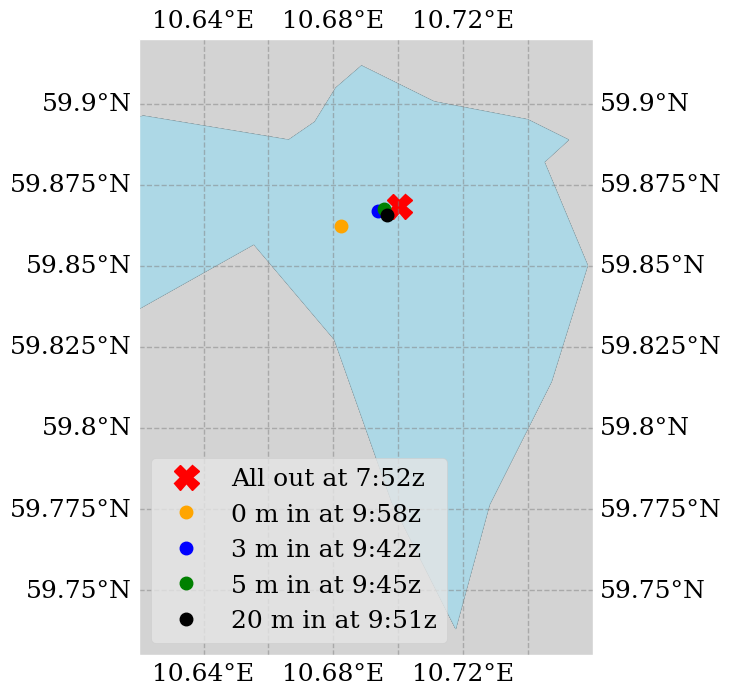

In [527]:
# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

fig = plt.figure(figsize=(10, 7))
# plot location on map
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 8))
# adding map features
ax.add_feature(cfeature.BORDERS, edgecolor = 'darkgray', linestyle='-')
ax.add_feature(cfeature.LAND, edgecolor = 'black', facecolor= 'lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor = 'lightblue', facecolor= 'lightblue')

#---------------------------
# ax.plot(lon[0], lat[0], 'ro', markersize=3, color="blue", transform=ccrs.PlateCarree())
# ax.plot(lon, lat, markersize=2, transform=ccrs.PlateCarree())
drifter_point(out, "red", "X", label="All out ")
drifter_point(in_m0, "orange", label="0 m in ")
drifter_point(in_m3, "blue", label="3 m in ")
drifter_point(in_m5, "green", label="5 m in ")
drifter_point(in_m20, "black", label="20 m in ")
#---------------------------
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([10.68, 10.705, 59.855, 59.88], ccrs.PlateCarree())
# ax.set_extent([10.62, 10.76, 59.73, 59.92], ccrs.PlateCarree())


#ax.set_title('Hydrographic measurment locations in the Oslo fjord')
plt.legend( loc="upper left")
# plt.legend( loc="lower left")

# plt.savefig(f"figures/drifters/drifters_tokt1.png", dpi=300, bbox_inches='tight')
plt.show()

In [528]:
#tokt2
out = df.iloc[5]
in_m0 = df.iloc[6]
in_m3 = df.iloc[8]
in_m5 = df.iloc[9]
in_m20 = df.iloc[7]

<Figure size 1000x700 with 0 Axes>

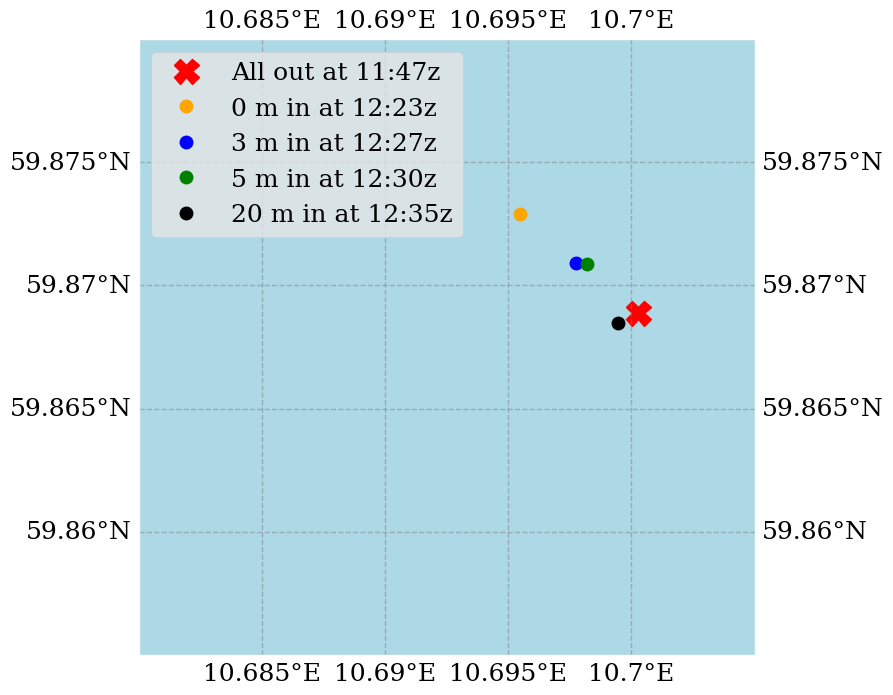

In [529]:
# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

fig = plt.figure(figsize=(10, 7))
# plot location on map
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 8))
# adding map features
ax.add_feature(cfeature.BORDERS, edgecolor = 'darkgray', linestyle='-')
ax.add_feature(cfeature.LAND, edgecolor = 'black', facecolor= 'lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor = 'lightblue', facecolor= 'lightblue')

#---------------------------
# ax.plot(lon[0], lat[0], 'ro', markersize=3, color="blue", transform=ccrs.PlateCarree())
# ax.plot(lon, lat, markersize=2, transform=ccrs.PlateCarree())
drifter_point(out, "red", "X", label="All out ")
drifter_point(in_m0, "orange", label="0 m in ")
drifter_point(in_m3, "blue", label="3 m in ")
drifter_point(in_m5, "green", label="5 m in ")
drifter_point(in_m20, "black", label="20 m in ")
#---------------------------
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([10.68, 10.705, 59.855, 59.88], ccrs.PlateCarree())
#ax.set_title('Hydrographic measurment locations in the Oslo fjord')
plt.legend( loc="upper left")
# plt.savefig(f"figures/drifters/drifters_tokt2.png", dpi=300, bbox_inches='tight')
plt.show()

# Distance and speed

In [530]:
from geopy.distance import geodesic


In [531]:
from datetime import datetime

def calculate_time_difference(start_time_str, finish_time_str):
    start_time = datetime.strptime(start_time_str, '%H:%M')
    finish_time = datetime.strptime(finish_time_str, '%H:%M')
    elapsed_time = (finish_time - start_time).total_seconds()
    return elapsed_time

In [532]:
#tokt1
out = tuple(map(float, df.iloc[0].Position.split(", ")))
in_m0 = tuple(map(float, df.iloc[1].Position.split(", ")))
in_m3 = tuple(map(float, df.iloc[3].Position.split(", ")))
in_m5 = tuple(map(float, df.iloc[4].Position.split(", ")))
in_m20 = tuple(map(float, df.iloc[2].Position.split(", ")))

# Calculate the distances in meters
distance_out_in_m0 = geodesic(out, in_m0).meters
distance_out_in_m3 = geodesic(out, in_m3).meters
distance_out_in_m5 = geodesic(out, in_m5).meters
distance_out_in_m20 = geodesic(out, in_m20).meters

# Calculate time in seconds
t_m0 = calculate_time_difference(df.iloc[0].Time, df.iloc[1].Time)
t_m3 = calculate_time_difference(df.iloc[0].Time, df.iloc[3].Time)
t_m5 = calculate_time_difference(df.iloc[0].Time, df.iloc[4].Time)
t_m20 = calculate_time_difference(df.iloc[0].Time, df.iloc[2].Time)

# Velocities
v_m0 = round(distance_out_in_m0*100 / t_m0, 2)
v_m3 = round(distance_out_in_m3*100 / t_m3, 2)
v_m5 = round(distance_out_in_m5*100 / t_m5, 2)
v_m20 =round(distance_out_in_m20*100 / t_m20, 2)
print(v_m0, v_m3, v_m5, v_m20)


16.05 6.14 4.11 5.05


In [533]:
# Define the data
data = [
    ["Drogue depth", "Distance (m)", "Time (min)", "Velocity (cm/s)"],
    ["0 m", round(distance_out_in_m0, 2), t_m0/60, v_m0],
    ["3 m", round(distance_out_in_m3, 2), t_m3/60, v_m3],
    ["5 m", round(distance_out_in_m5, 2), t_m5/60, v_m5],
    ["20 m", round(distance_out_in_m20, 2), t_m20/60, v_m20],
]

# Define the CSV file path
csv_file_path = "data/drifters/current_data1.csv"

# Create and write to the CSV file
with open(csv_file_path, "w", newline="") as csvfile:
    for row in data:
        csvfile.write(",".join(map(str, row)) + "\n")

print(f"CSV data has been saved to {csv_file_path}.")



CSV data has been saved to data/drifters/current_data1.csv.


In [534]:
#tokt2
out = tuple(map(float, df.iloc[5].Position.split(", ")))
in_m0 = tuple(map(float, df.iloc[6].Position.split(", ")))
in_m3 = tuple(map(float, df.iloc[8].Position.split(", ")))
in_m5 = tuple(map(float, df.iloc[9].Position.split(", ")))
in_m20 = tuple(map(float, df.iloc[7].Position.split(", ")))

# Calculate the distances in meters
distance_out_in_m0 = geodesic(out, in_m0).meters
distance_out_in_m3 = geodesic(out, in_m3).meters
distance_out_in_m5 = geodesic(out, in_m5).meters
distance_out_in_m20 = geodesic(out, in_m20).meters

# Calculate time in seconds
t_m0 = calculate_time_difference(df.iloc[5].Time, df.iloc[6].Time)
t_m3 = calculate_time_difference(df.iloc[5].Time, df.iloc[8].Time)
t_m5 = calculate_time_difference(df.iloc[5].Time, df.iloc[9].Time)
t_m20 = calculate_time_difference(df.iloc[5].Time, df.iloc[7].Time)

# Velocities
v_m0 = round(distance_out_in_m0*100 / t_m0, 2)
v_m3 = round(distance_out_in_m3*100 / t_m3, 2)
v_m5 = round(distance_out_in_m5*100 / t_m5, 2)
v_m20 =round(distance_out_in_m20*100/ t_m20, 2)
print(v_m0, v_m3, v_m5, v_m20)

24.1 11.14 9.69 2.22


In [535]:
# Define the data
data = [
    ["Drogue depth", "Distance (m)", "Time (min)", "Velocity (cm/s)"],
    ["0 m", round(distance_out_in_m0, 2), t_m0/60, v_m0],
    ["3 m", round(distance_out_in_m3, 2), t_m3/60, v_m3],
    ["5 m", round(distance_out_in_m5, 2), t_m5/60, v_m5],
    ["20 m", round(distance_out_in_m20, 2), t_m20/60, v_m20],
]


# Define the CSV file path
csv_file_path = "data/drifters/current_data2.csv"

# Create and write to the CSV file
with open(csv_file_path, "w", newline="") as csvfile:
    for row in data:
        csvfile.write(",".join(map(str, row)) + "\n")

print(f"CSV data has been saved to {csv_file_path}.")



CSV data has been saved to data/drifters/current_data2.csv.
